Variância explicada pelos componentes:
[0.13346977 0.07213753]


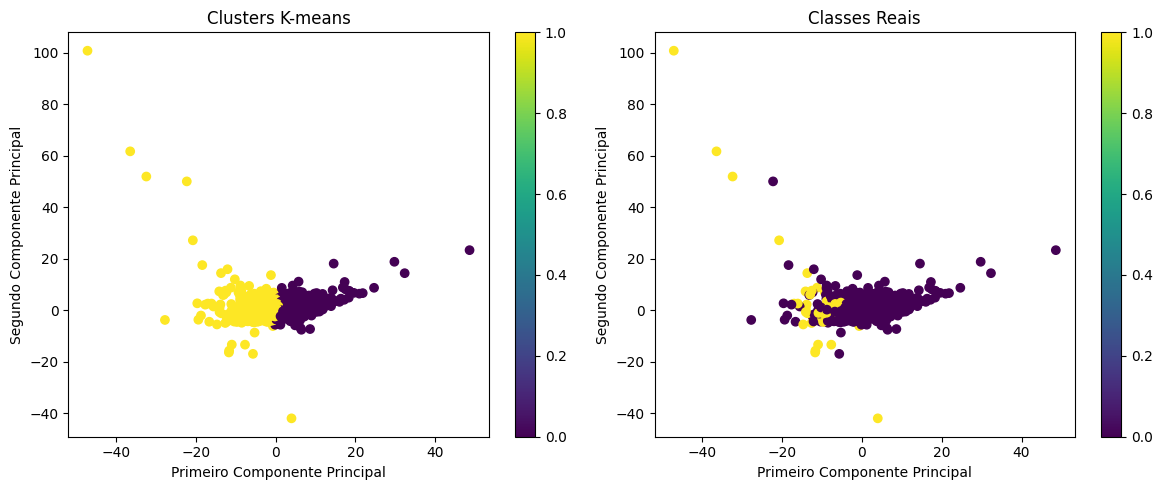


Métricas de Avaliação:
Adjusted Rand Index: -0.022
Silhouette Score: 0.109

Características médias dos clusters:
         ROA(C) before interest and depreciation before interest  \
Cluster                                                            
0                                                 0.784604         
1                                                -0.461371         

         ROA(A) before interest and % after tax  \
Cluster                                           
0                                      0.747780   
1                                     -0.439717   

         ROA(B) before interest and depreciation after tax  \
Cluster                                                      
0                                                 0.758035   
1                                                -0.445747   

         Operating Gross Margin  Realized Sales Gross Margin  \
Cluster                                                        
0                      0.435246

In [1]:
# Célula 1: Importações
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Célula 2: Carregamento e preparação dos dados
# Carregando dados
dados = pd.read_csv('../data/processed/dados_preprocessados.csv')
X = dados.iloc[:, 1:].astype(float)  # Features
y_true = dados.iloc[:, 0]  # Classes reais

# Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Célula 3: Aplicação do PCA para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Variância explicada pelos componentes:")
print(pca.explained_variance_ratio_)

# Célula 4: K-Means Clustering
# Número de clusters igual ao número de classes
n_clusters = len(np.unique(y_true))
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Célula 5: Visualização dos resultados
plt.figure(figsize=(12, 5))

# Plot 1: Clusters
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters K-means')
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.colorbar(scatter)

# Plot 2: Classes reais
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis')
plt.title('Classes Reais')
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

# Célula 6: Análise dos clusters
# Calculando métricas
rand_score = adjusted_rand_score(y_true, clusters)
silhouette_avg = silhouette_score(X_scaled, clusters)

print("\nMétricas de Avaliação:")
print(f"Adjusted Rand Index: {rand_score:.3f}")
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Análise das características dos clusters
cluster_df = pd.DataFrame(X_scaled, columns=X.columns)
cluster_df['Cluster'] = clusters

print("\nCaracterísticas médias dos clusters:")
cluster_means = cluster_df.groupby('Cluster').mean()
print(cluster_means)

# Célula 7: Salvando resultados
resultados_clustering = {
    'pca_components': X_pca,
    'clusters': clusters,
    'metricas': {
        'adjusted_rand_score': rand_score,
        'silhouette_score': silhouette_avg
    },
    'cluster_means': cluster_means
}

# Salvando em formato CSV
pd.DataFrame(X_pca, columns=['PC1', 'PC2']).to_csv(
    '../data/processed/pca_components.csv', index=False)
pd.Series(clusters).to_csv(
    '../data/processed/cluster_assignments.csv', index=False)